In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\\Data Analytics Projects\\Churn Analysis\\Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### check for null values in the data

In [9]:
df.isnull().sum().sum()

0

### check for basic statistics of the data

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### check for duplicates in entire data and in the unique id column

In [12]:
df.duplicated().sum()

0

In [13]:
df["customerID"].duplicated().sum()

0

### converting 0 and 1 values of senior citizen column to yes/no to make it easier to understand

In [14]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


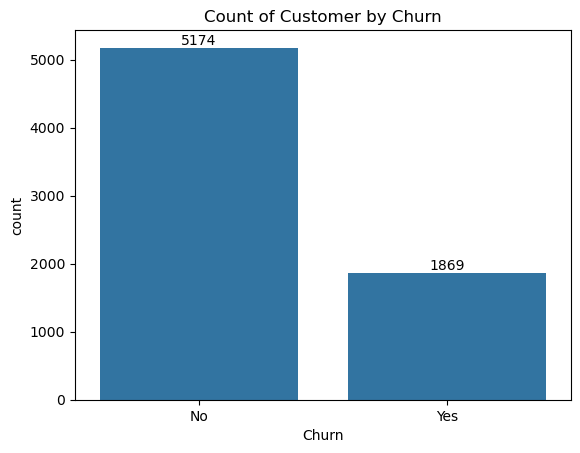

In [23]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [19]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


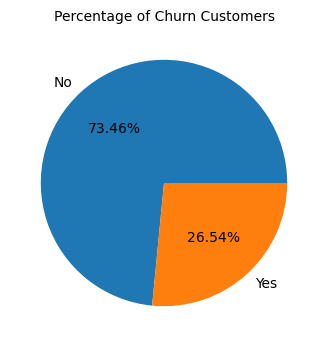

In [68]:
plt.figure(figsize = (4,4))
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers", fontsize = 10)
plt.show()

### from the given piechart we can conclude that 26.54% of our customers are churned out.
#### Now let's find out the reason behind it.

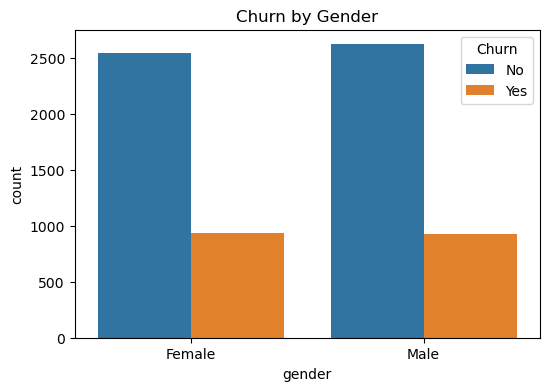

In [35]:
plt.figure(figsize = (6,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

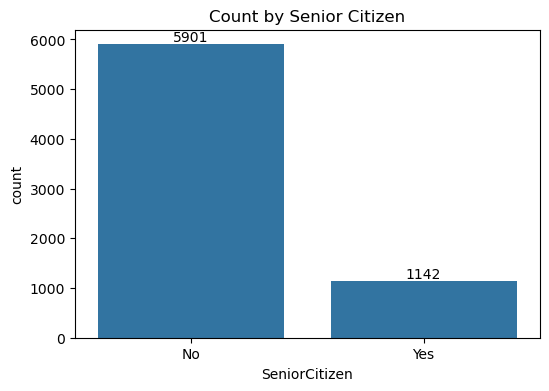

In [40]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count by Senior Citizen")
plt.show()

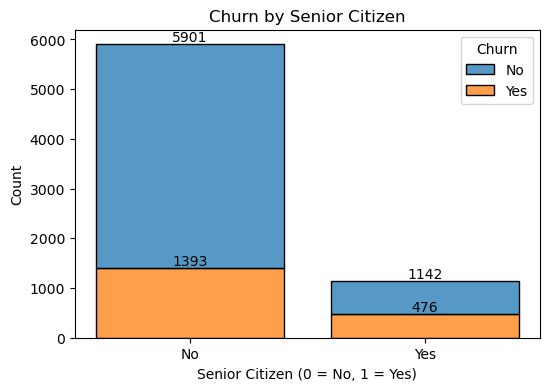

In [44]:
##import seaborn as sns
##import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Stacked Bar Chart using histplot
ax = sns.histplot(data=df, x="SeniorCitizen", hue="Churn", multiple="stack", shrink=0.8)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container)

# Title and Display
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<Figure size 600x400 with 0 Axes>

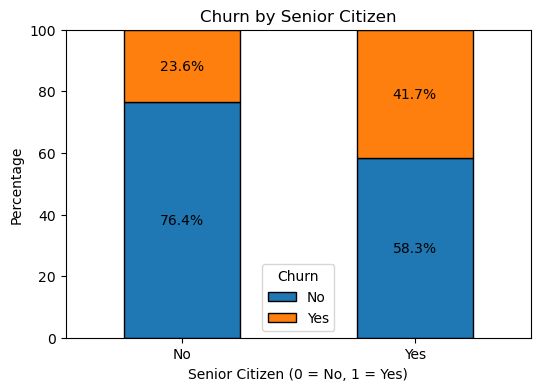

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute proportions for 100% stacking
df_grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
plt.figure(figsize=(6, 4))
ax = df_percent.plot(kind="bar", stacked=True, figsize=(6, 4), edgecolor="black")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

# Formatting
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.ylim(0, 100)  # Ensure it represents 100%
plt.xticks(rotation=0)

# Show Plot
plt.show()


### compartively greater percentage of people from senior citizen category have chured.

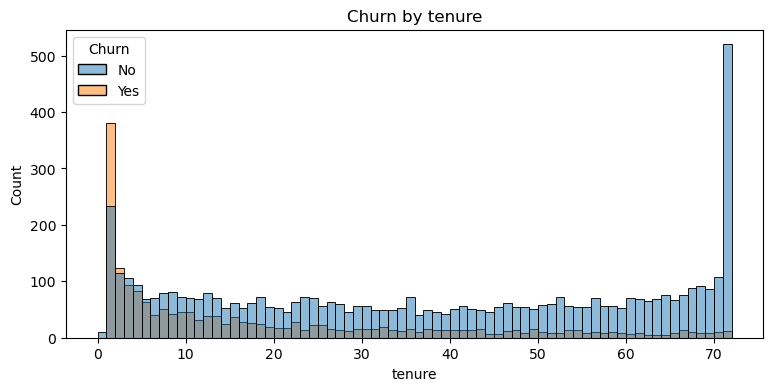

In [66]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Churn by tenure")
plt.show()

### people who have used our services for long time have stayed with us but the people who have used our services for 1 or 2 months have churned out.

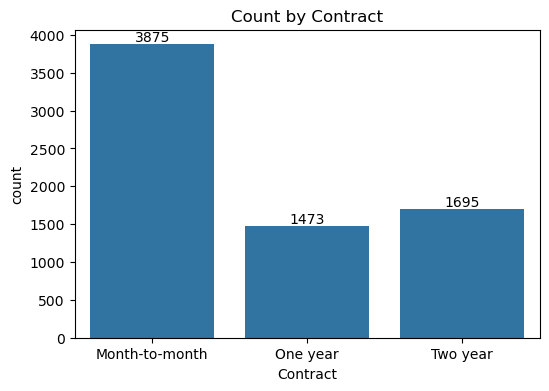

In [52]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count by Contract")
plt.show()

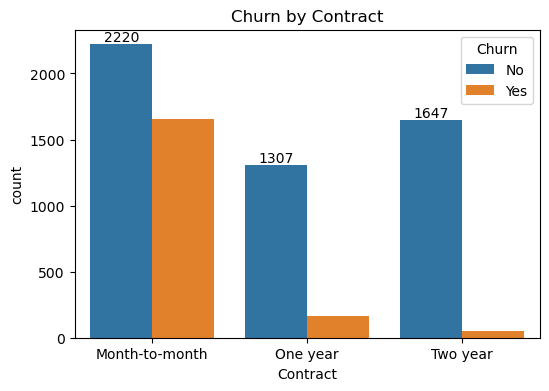

In [65]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

### people who have month to month contract are likely to be churned then those who have 1 or 2 years of contract

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

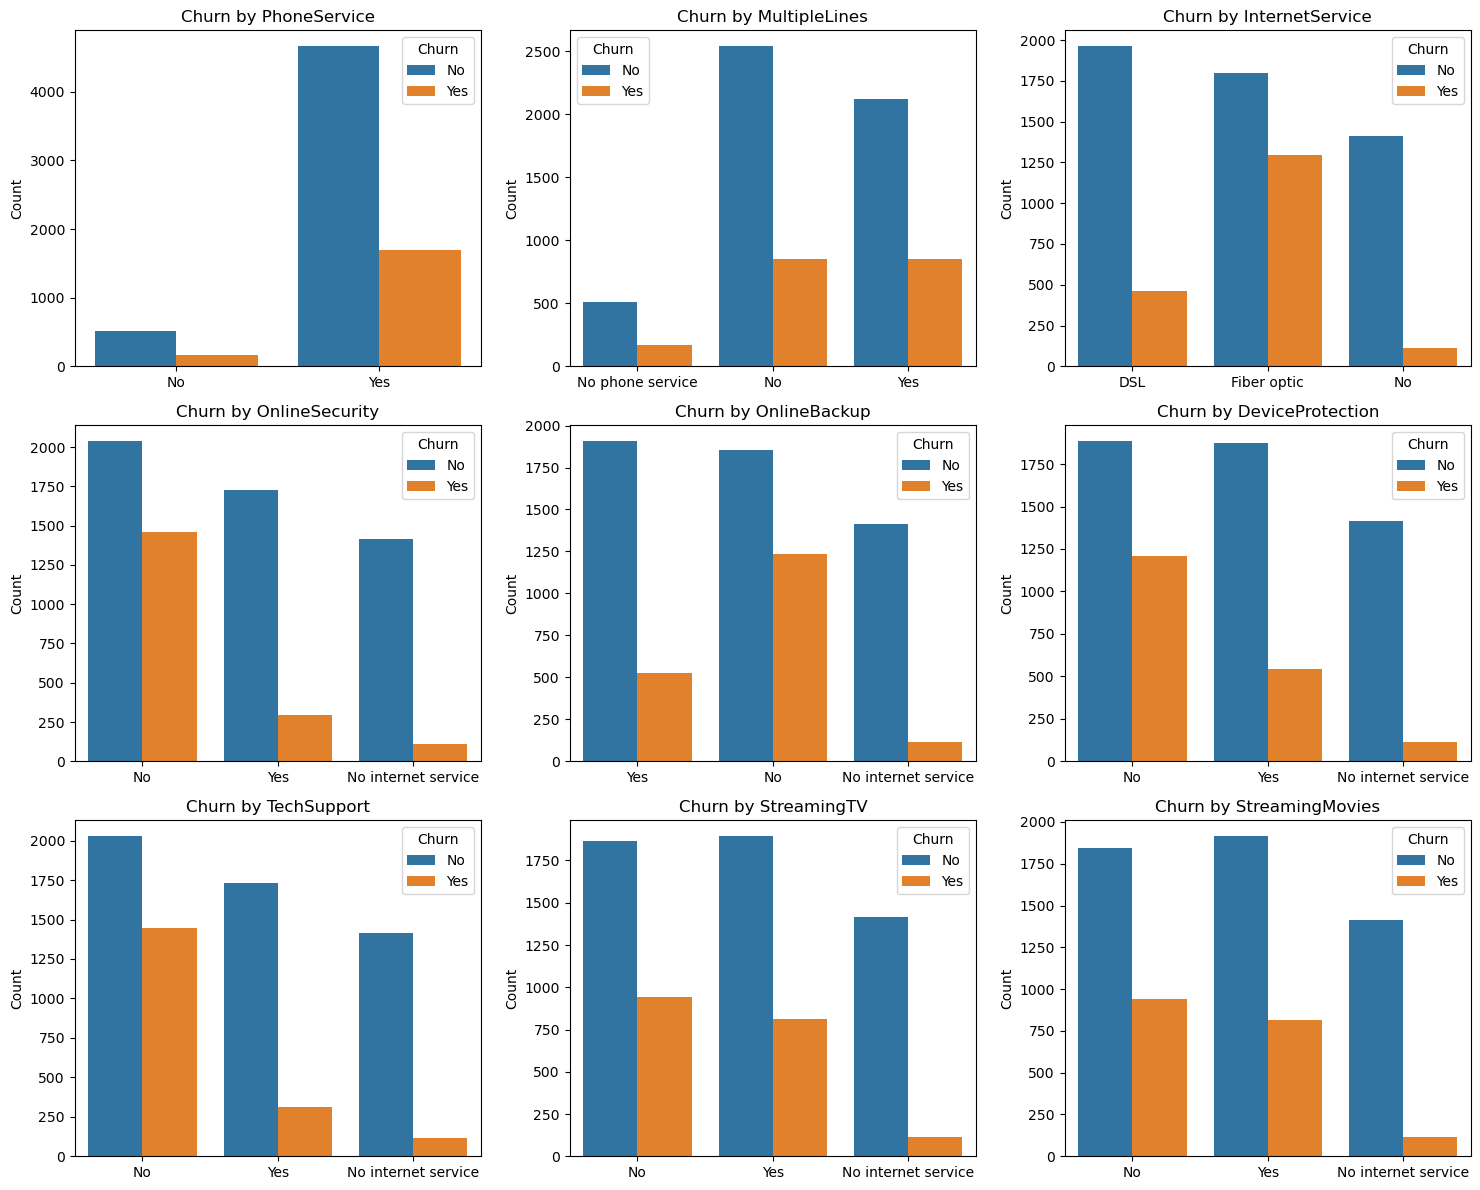

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate countplots for each categorical column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = "Churn")
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x')  # Rotate x labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


### Each plot reveals how customer churn varies across different service categories. 
  Key insights include:  
- Customers without additional services like **OnlineSecurity, TechSupport, and Streaming services** tend to have **higher churn rates**.  
- **Fiber optic users** have higher churn than DSL users, indicating possible dissatisfaction.  
- Most customers have **PhoneService**, but those without it show lower churn.  
- Across most services, churned customers are significantly fewer than non-churned ones, but the proportion varies by service type.

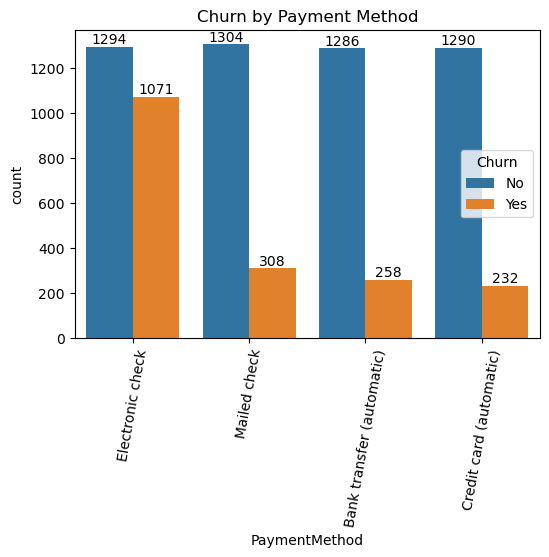

In [63]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 75)
plt.title("Churn by Payment Method")
plt.show()

### customer is likely to churn when he is using electronic check as a payment method.